# Breast Cancer Wisconsin Diagnostic Prediction
**Benign or Malignant Cancer Tumors**

### Data Analysis & Data Visualization

#### **Developed by** [**Parth Maniar** ](https://github.com/officialpm)  🖖

<img src="https://visitor-badge.laobi.icu/badge?page_id=officialpm.BreastCancerDataAnalysis" alt="visitor badge"/>
<div>

<a href="mailto:officialparthmaniar@gmail.com">
  <img align="left" alt="Parth's LinkedIn" width="22px" src="https://cdn.jsdelivr.net/npm/simple-icons@v3/icons/gmail.svg" />
</a>

<a href="https://twitter.com/parthcodes">
  <img align="left" alt="Parth | Twitter" width="22px" src="https://cdn.jsdelivr.net/npm/simple-icons@v3/icons/twitter.svg" />
</a>
<a href="https://www.linkedin.com/in/parthdmaniar/">
  <img align="left" alt="Parth's LinkedIn" width="22px" src="https://cdn.jsdelivr.net/npm/simple-icons@v3/icons/linkedin.svg" />
</a>
<a href="https://t.me/parthmaniar">
  <img align="left" alt="Parth's Telegram" width="22px" src="https://cdn.jsdelivr.net/npm/simple-icons@v3/icons/telegram.svg" />
</a>


</div>
<br/>

---


## Downloading dataset from UCI
---
Dataset Link - https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data

--2020-11-11 13:36:26--  https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 124103 (121K) [application/x-httpd-php]
Saving to: ‘wdbc.data’

wdbc.data           100%[===================>] 121.19K   627KB/s    in 0.2s    

2020-11-11 13:36:27 (627 KB/s) - ‘wdbc.data’ saved [124103/124103]



## Import Packages 


In [2]:
import pandas as pd
from pandas import set_option
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, train_test_split
from sklearn.preprocessing import normalize 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error as mse
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.feature_selection import SelectKBest
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from matplotlib import rcParams
rcParams['xtick.major.pad'] = 1
rcParams['ytick.major.pad'] = 1

## Data analysis and Vizualization

In [3]:
headers = ["id","diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"]
data = pd.read_csv('wdbc.data', names=headers)

In [4]:
data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [5]:
diagnosis_coder = {'M':1, 'B':0}
data.diagnosis = data.diagnosis.map(diagnosis_coder)

In [6]:
data = data.drop(['id'],axis=1)

In [7]:
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Quick glimpse of tumor features (mean values) in relation to diagnosis

In [8]:
data.groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


### Visual comparisons of differential diagnosis

In [9]:
outcome_count = data.diagnosis.value_counts()
outcome_count = pd.Series(outcome_count)
outcome_count = pd.DataFrame(outcome_count)
outcome_count.index = ['Benign', 'Malignant']

outcome_count['Percent'] = 100*outcome_count['diagnosis']/sum(outcome_count['diagnosis'])
outcome_count['Percent'] = outcome_count['Percent'].round().astype('int')

print('The Perecentage of tumors classified as \'malignant\' in this data set is: {}'.format(100*float(data.diagnosis.value_counts()[1])/float((len(data)))))
print('\nA good classifier should therefore outperform blind guessing knowing the proportions i.e. > 62% accuracy')
outcome_count

The Perecentage of tumors classified as 'malignant' in this data set is: 37.25834797891037

A good classifier should therefore outperform blind guessing knowing the proportions i.e. > 62% accuracy


,diagnosis,Percent
Benign,357,63
Malignant,212,37


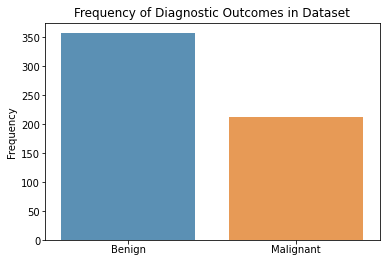

In [10]:
# Visualize frequency of diagnoses in dataset
sns.barplot(x = ['Benign', 'Malignant'], y = 'diagnosis', data = outcome_count, alpha = .8)
plt.title('Frequency of Diagnostic Outcomes in Dataset')
plt.ylabel('Frequency')
plt.show()

### Visual Inspection of data looking at distrubution/variance for histology of benign and malignant tumors biopsies.

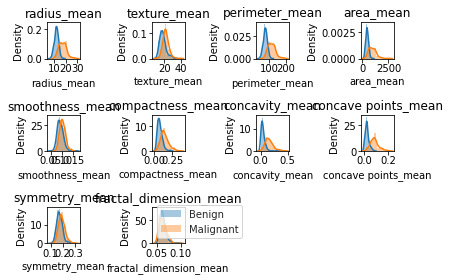

In [11]:
fig = plt.figure()

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(data.columns[1:11]):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(3,4,i)
    
    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    sns.distplot(data[data['diagnosis'] == 0][b], kde=True, label='Benign')
    sns.distplot(data[data['diagnosis'] == 1][b], kde=True, label='Malignant')
   
    ax.set_title(b)

sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()

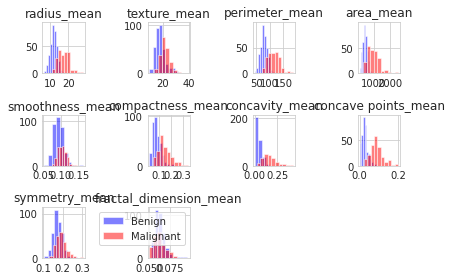

In [12]:
# Visualize tumor characteristics for positive and negatives diagnoses 


# Instantiate figure object
fig = plt.figure()
#plt.sup_title('Tumor Characteristic (means)')

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(data.columns[1:11]):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(3,4,i)
    
    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    ax.hist(data[data['diagnosis'] == 0][b], label = 'Benign', stacked = True, alpha=0.5, color= 'b')
    ax.hist(data[data['diagnosis'] == 1][b], label= 'Malignant', stacked = True, alpha=0.5, color= 'r')
    
    ax.set_title(b)

sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()

No handles with labels found to put in legend.


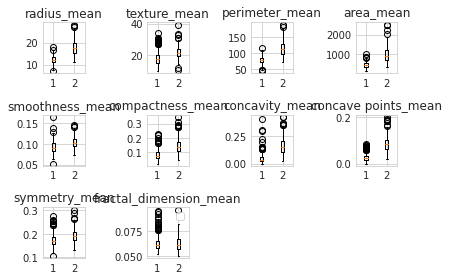

In [13]:
fig = plt.figure()

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(data.columns[1:11]):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(3,4,i)
    
    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    ax.boxplot([data[data['diagnosis'] == 0][b], data[data['diagnosis'] == 1][b]])

    ax.set_title(b)

sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()

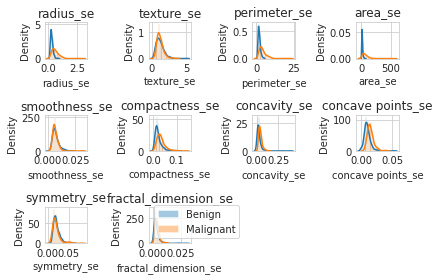

In [14]:
fig = plt.figure()

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(data.columns[11:21]):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(3,4,i)
    
    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    sns.distplot(data[data['diagnosis'] == 0][b], kde=True, label='Benign')
    sns.distplot(data[data['diagnosis'] == 1][b], kde=True, label='Malignant')
   
    ax.set_title(b)

sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()

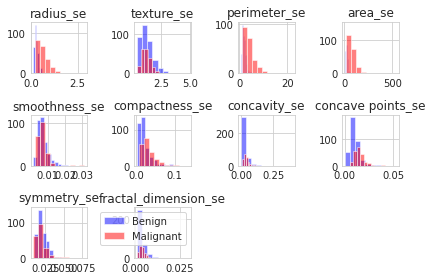

In [15]:
fig = plt.figure()

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(data.columns[11:21]):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(3,4,i)
    
    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    ax.hist(data[data['diagnosis'] == 0][b], label = 'Benign', stacked = True, alpha=0.5, color= 'b')
    ax.hist(data[data['diagnosis'] == 1][b], label= 'Malignant', stacked = True, alpha=0.5, color= 'r')
    
    ax.set_title(b)

sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()

No handles with labels found to put in legend.


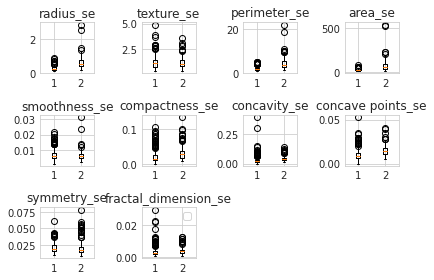

In [16]:
fig = plt.figure()

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(data.columns[11:21]):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(3,4,i)
    
    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    plt.boxplot([data[data['diagnosis'] == 0][b], data[data['diagnosis'] == 1][b]])

    ax.set_title(b)

sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()

### Quick analysis of all the features

In [17]:
headers = ["id","diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"]
data = pd.read_csv('wdbc.data', names=headers)

col = data.columns       # .columns gives columns names in data 
Y = data.diagnosis                          # M or B 
list = ['id','diagnosis']
X = data.drop(list,axis = 1 )
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

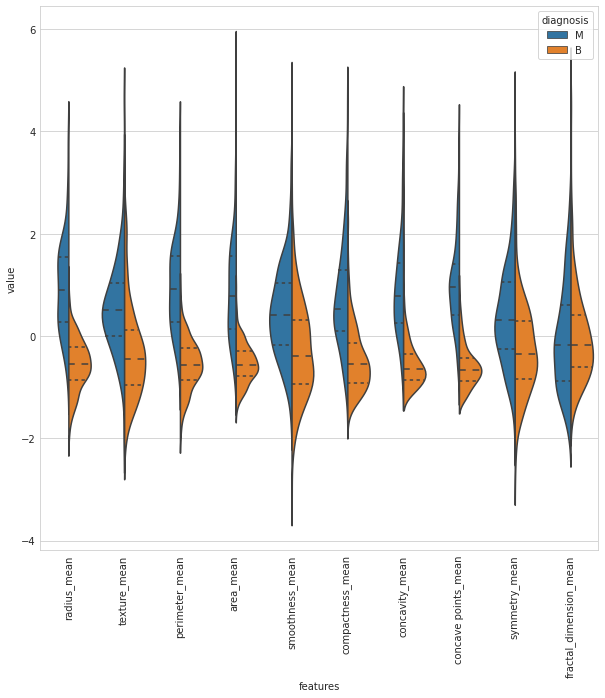

In [18]:
# first ten features
data_dia = Y
data = X
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([Y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

From the violin plot we can identify that which features are good for data classification.

like **concave points_mean** and **concavity_mean** has large diffrence on there median values, so this features may be very good for data classification.

but on the other hand **Median** value of **symmetry_mean** and **fractal_dimension_mean** are very close, like data present in **Benign** and **Malignant** must have similar values because of that **we can not distinguish Benign and Malignant cancer from these record properly**.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

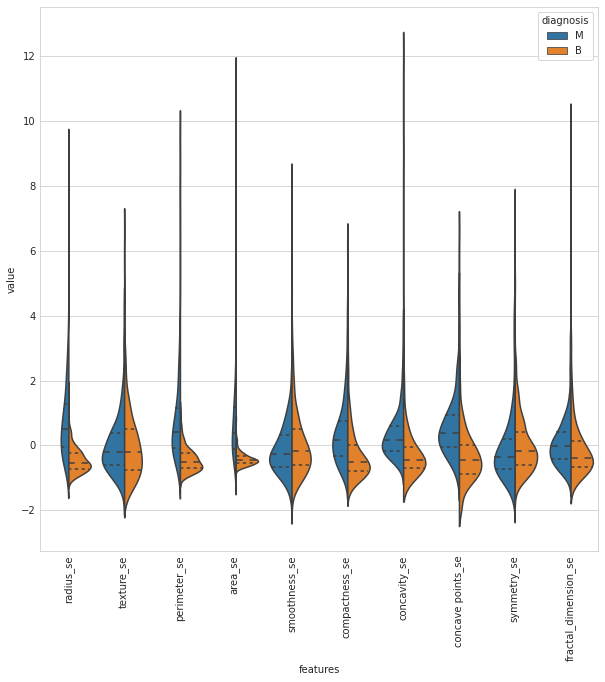

In [19]:
# Second ten features
data = pd.concat([Y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

Here **radius_se**, **perimeter_se** and **area_se** has a significance difference in median value So these feature may be important for cancer classification.

But **texture_se**, **smoothness_se** has very less difference in median value, so these feature may not important for cancer classification.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

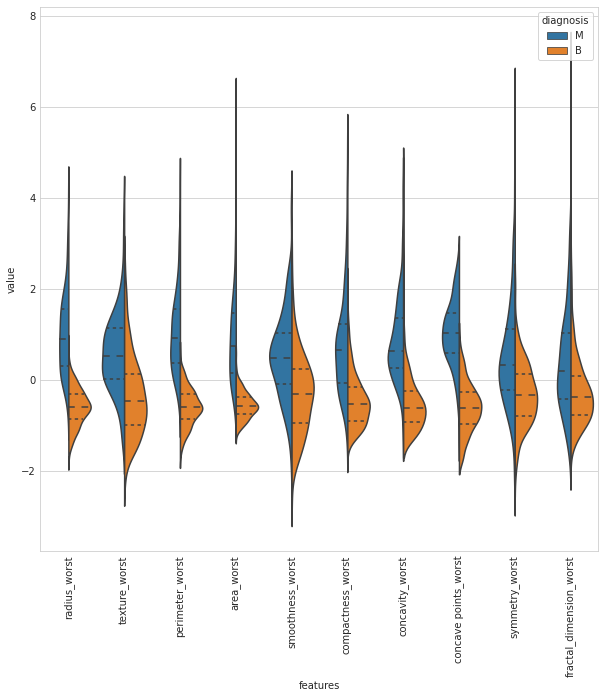

In [20]:
# Third ten features
data = pd.concat([Y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

Here **area_worst**, **concavity_worst** and **concave points_worst** has a significance difference in median value So these feature may be important for cancer classification.

But **symmerty_worst**, **fractal_dimension_worst** has very less difference in median value, so these feature may not important for cancer classification

### Box Plot

Box plot is an alternative of voilin plot also used to identify which features are useful for classification.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

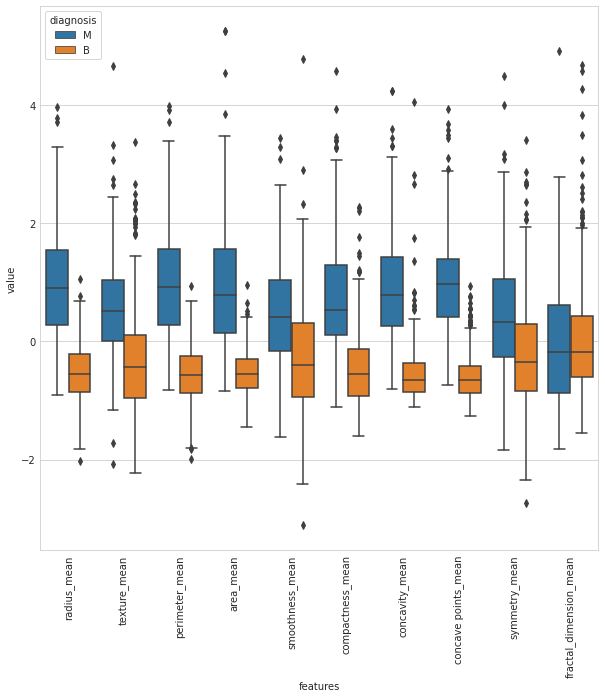

In [21]:
data = pd.concat([Y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

Here **radius_mean**, **perimeter_mean** and **area_mean** has a significance difference in median value So these feature may be important for cancer classification. but box plot of these feature are nearly same, so we can take any one feature from these feature to reduce the dimention of data or to reduce the computation power for prediction, because these feature having nearly same 25, 50 and 75 percentile value. so we can say our model will not learn different thing if we use all of these feature.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

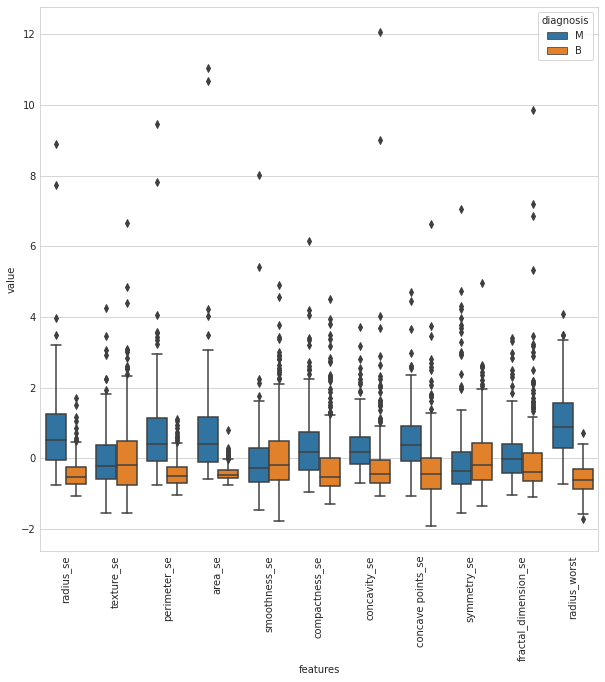

In [22]:
data = pd.concat([Y,data_n_2.iloc[:,10:21]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

Here **radius_se**, **perimeter_se** has a significance difference in median value So these feature may be important for cancer classification. but box plot of these feature are nearly same, so we can take any one feature from these feature to reduce the dimention of data or to reduce the computation power for prediction, because these feature having nearly same 25, 50 and 75 percentile value. so we can say our model will not learn different thing if we use all of these feature.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

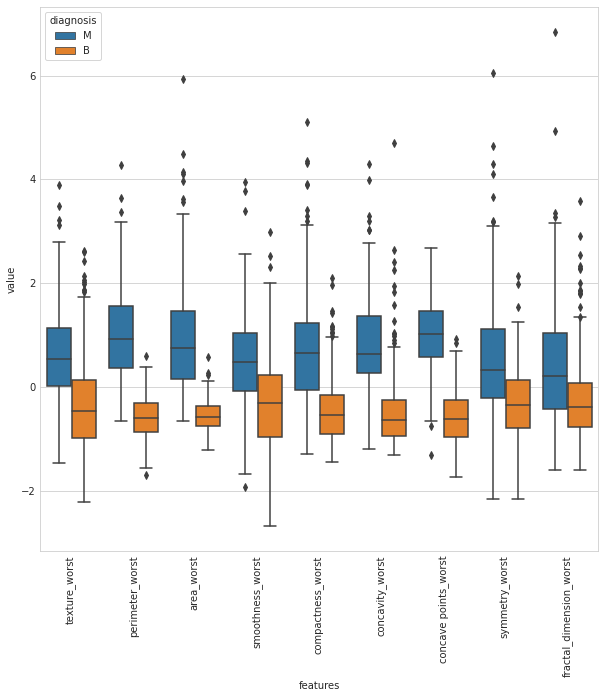

In [23]:
data = pd.concat([Y,data_n_2.iloc[:,21:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

To identify which feature has same distribution of data, we can use **joint plot**.
If we are getting straight line for the two feature, we can say that these two feature are having same distribution of data, or we can remove one feature from data.

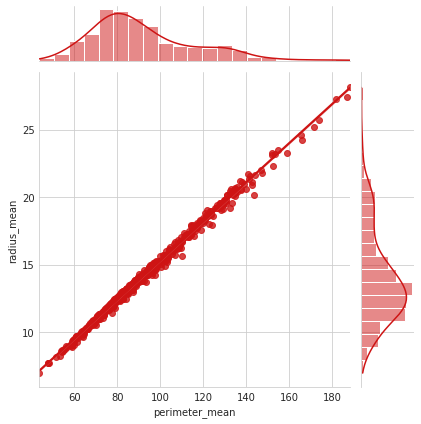

In [24]:
sns.jointplot(X.loc[:,'perimeter_mean'], X.loc[:,'radius_mean'], kind="reg", color="#ce1414")

we can see that we are getting straigth line for **perimeter_mean** and **radius_mean**, So we can say that these two feature are co-related or having same distribution of data, so we will choose any one from these feature for classification.

### Pair Grid

We can also compare three or more feature at a time using Pair Grid.

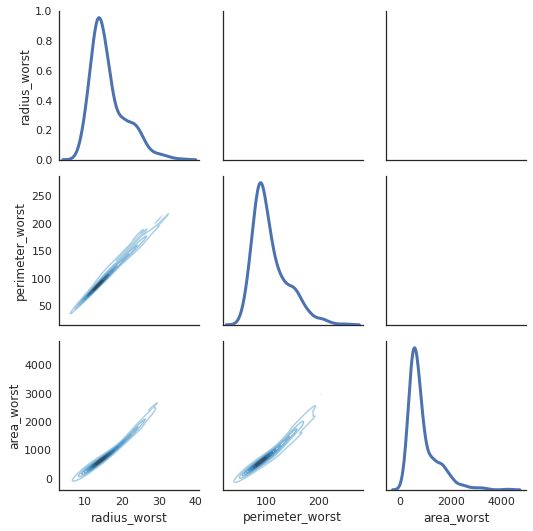

In [25]:
sns.set(style="white")
df = X.loc[:,['radius_worst','perimeter_worst','area_worst']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

Here we are getting stragiht line for these feature, so we can take any one feature for cancer classification.

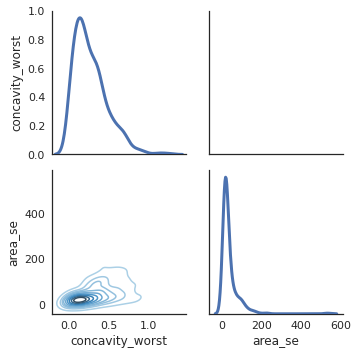

In [26]:
sns.set(style="white")
df = X.loc[:,['concavity_worst','area_se']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

Here we can see that we are not getting straight line for these two features because this two feature are having different distribution.

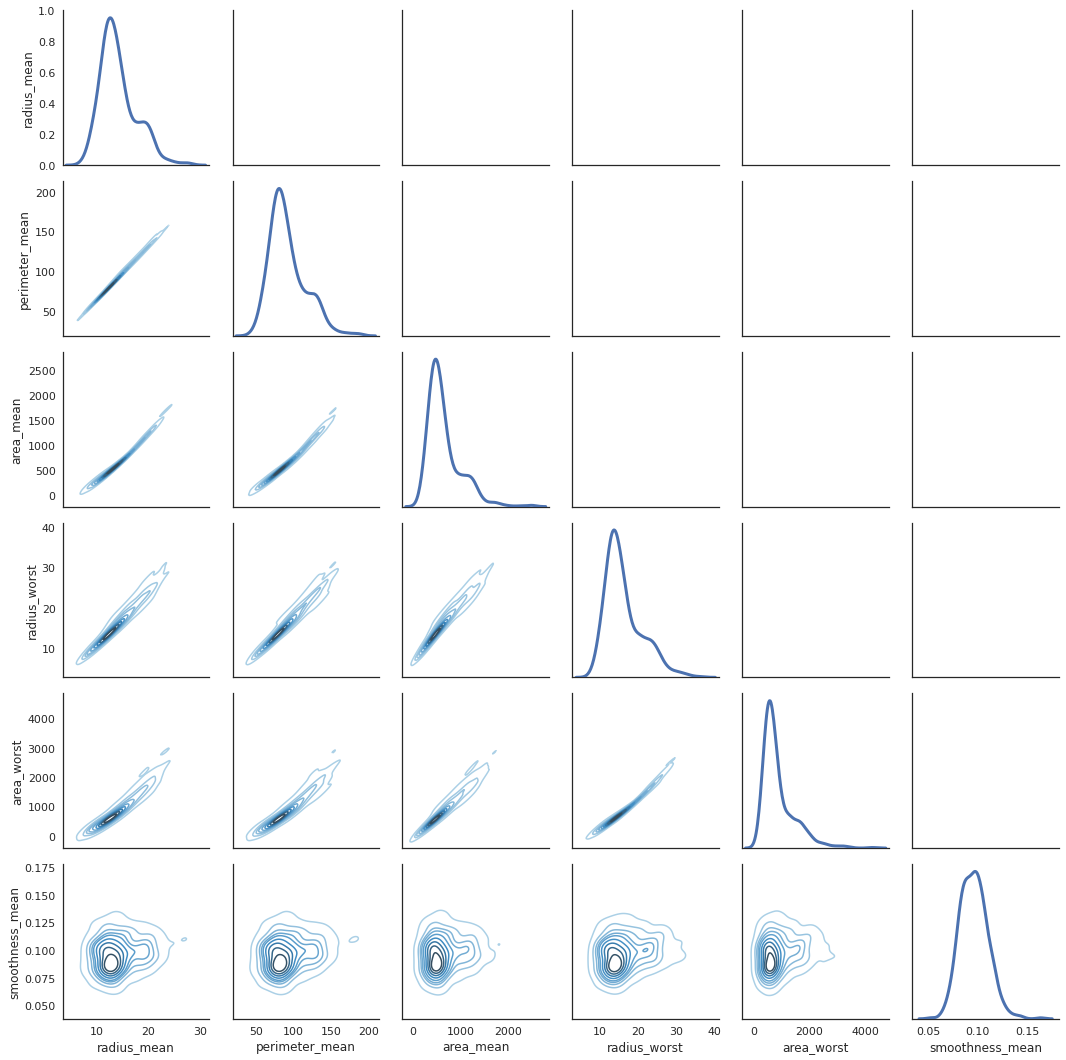

In [27]:
sns.set(style="white")
df = X.loc[:,['radius_mean','perimeter_mean','area_mean', 'radius_worst','area_worst','smoothness_mean']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

### Correlation Map

We can observe correlation among all the features using correlation map.

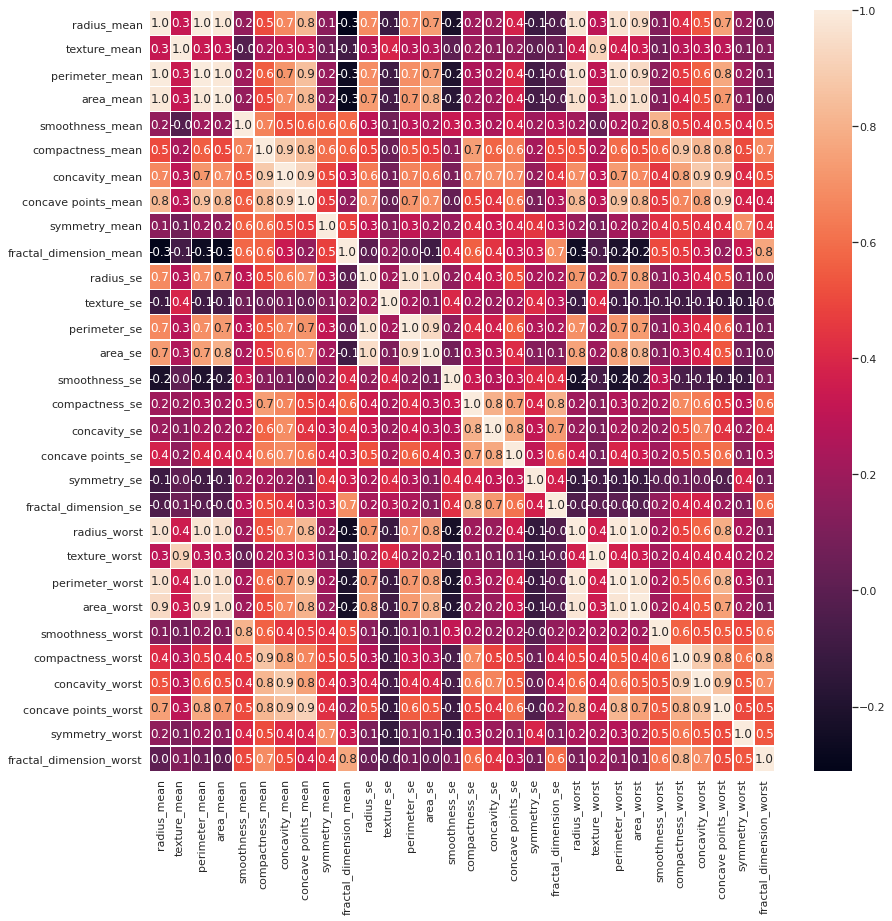

In [28]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

from the diagram 1.0 indicates that these features have same distribution. we can remove those features except one which are having same distribution, using the diagram. I have removed **'perimeter_mean','area_mean','radius_worst','perimeter_worst','radius_se'** features because these features having 1.0 value and corelated with other feature.

In [29]:
drop_list = ['perimeter_mean','area_mean','radius_worst','perimeter_worst','radius_se']
x = X.drop(drop_list,axis = 1 )        # do not modify x, we will use it later 
x.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Shape of data after removing the corelate features

In [30]:
x.shape

(569, 25)

Correlation map of rest of the features

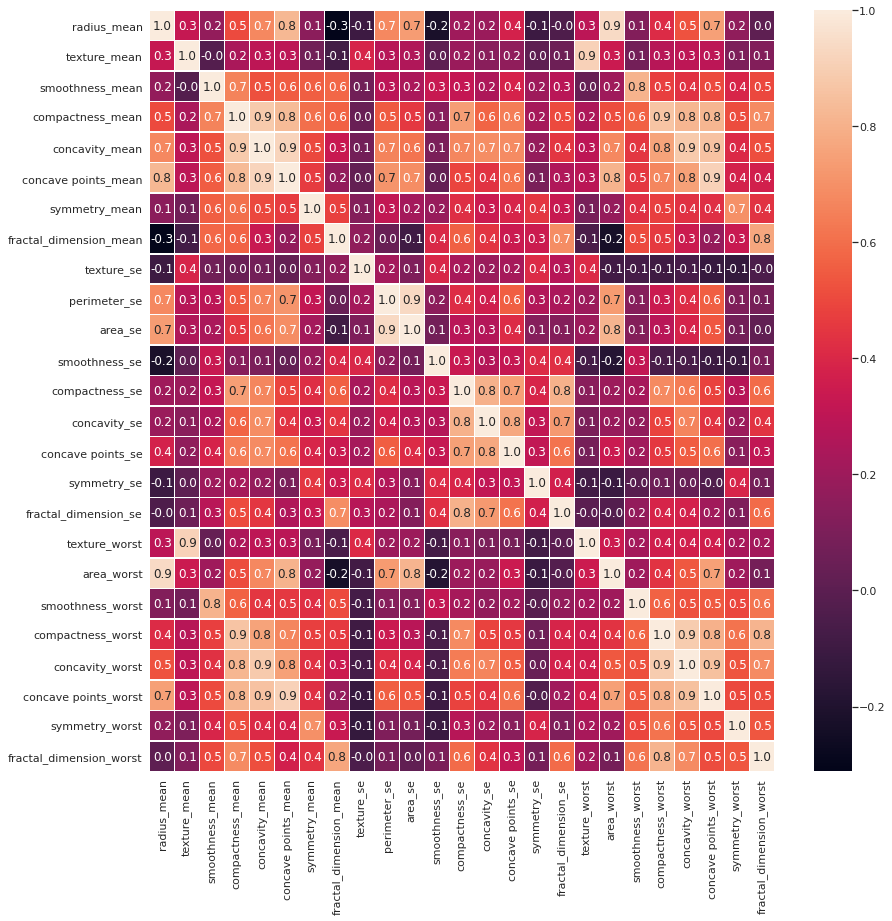

In [31]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)